In [1]:
#Libraries
import astropy.units as u
from astropy.time import Time
from astropy.coordinates import EarthLocation
import matplotlib.pyplot as plt
import numpy as np
import requests
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from matplotlib.patches import Polygon
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "notebook"
import pandas as pd

from tqdm import tqdm
import requests

In [7]:
np.__version__

'2.1.3'

### Import the DECam telemetry and streaks datasets


In [8]:
telemetry1 = pd.read_csv('decam_telemetry_20230817.csv.gz')


In [9]:
telemetry1

,EXPNUM,BAND,TELESCOP,OBSERVAT,INSTRUME,OBS-LONG,OBS-LAT,OBS-ELEV,TELEQUIN,TIMESYS,DATE-OBS,TIME-OBS,DARKTIME,EXPTIME,RA,DEC,AZ,ZD
0,140520,r,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2012-10-20 00:25:35.429106,00:25:35.429106,2.10353,1.0,22:08:24.000,-32:59:17.599,116.2500,7.09
1,140521,r,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2012-10-20 00:29:50.667562,00:29:50.667562,2.09597,1.0,22:08:23.970,-32:55:57.799,118.9300,6.25
2,140522,u,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2012-10-20 00:46:16.576959,00:46:16.576959,31.09820,30.0,18:03:35.240,-30:02:00.600,254.2700,50.20
3,140523,u,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2012-10-20 00:47:44.370016,00:47:44.370016,31.09300,30.0,18:03:35.250,-30:02:00.802,254.1500,50.50
4,140524,u,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2012-10-20 00:49:47.211636,00:49:47.211636,31.09170,30.0,18:03:35.240,-30:02:00.802,253.9900,50.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506513,1228730,g,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2023-08-03 08:42:53.917964,08:42:53.917964,81.10140,80.0,03:30:36.090,-28:05:58.200,97.1620,36.05
506514,1228731,r,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2023-08-03 08:44:44.058111,08:44:44.058111,71.12170,70.0,03:30:36.079,-28:05:58.200,97.0003,35.66
506515,1228732,r,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2023-08-03 08:46:22.681357,08:46:22.681357,71.10870,70.0,03:30:36.090,-28:05:58.200,96.8515,35.30
506516,1228733,i,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2023-08-03 08:48:02.549261,08:48:02.549261,91.09020,90.0,03:30:36.112,-28:05:58.099,96.7036,34.94


In [10]:
telemetry1.columns

Index(['EXPNUM', 'BAND', 'TELESCOP', 'OBSERVAT', 'INSTRUME', 'OBS-LONG',
       'OBS-LAT', 'OBS-ELEV', 'TELEQUIN', 'TIMESYS', 'DATE-OBS', 'TIME-OBS',
       'DARKTIME', 'EXPTIME', 'RA', 'DEC', 'AZ', 'ZD'],
      dtype='object')

In [11]:
streaks1 = pd.read_csv('streaks_augmented_20230817.csv.gz')



In [6]:
streaks1

,filename,rnum,ra_1,ra_2,ra_3,ra_4,dec_1,dec_2,dec_3,dec_4,expnum,ccdnum,band
0,D00145425_g_c03_r4148p01_hstreak.fits,3,1.159330,1.160919,1.164310,1.162720,-28.724241,-28.724212,-28.857155,-28.857183,145425,3,g
1,D00145425_g_c06_r4148p01_hstreak.fits,1,0.986677,0.986711,0.644209,0.644186,-29.032018,-29.034283,-29.037208,-29.034944,145425,6,g
2,D00145425_g_c09_r4148p01_hstreak.fits,1,0.452852,0.452942,0.109842,0.109782,-29.193042,-29.199694,-29.203265,-29.196615,145425,9,g
3,D00145425_g_c15_r4148p01_hstreak.fits,1,0.286716,0.286812,0.630816,0.630741,-29.363308,-29.358405,-29.362739,-29.367644,145425,15,g
4,D00145425_g_c16_r4148p01_hstreak.fits,1,0.985852,0.987446,0.987211,0.985615,-29.216748,-29.216752,-29.366385,-29.366381,145425,16,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...
879115,D01223535_g_c05_r6224p01_hstreak.fits,1,323.500201,323.502653,323.444690,323.442238,-17.828499,-17.830897,-17.884254,-17.881855,1223535,5,g
879116,D01223535_g_c31_r6224p01_hstreak.fits,1,324.355544,324.369908,324.372363,324.357994,-18.392109,-18.391941,-18.541070,-18.541235,1223535,31,g
879117,D01223535_g_c56_r6224p01_hstreak.fits,1,322.914589,322.934330,322.849385,322.829651,-19.193809,-19.210870,-19.298406,-19.281342,1223535,56,g
879118,D01223535_g_c58_r6224p01_hstreak.fits,1,323.771850,323.783894,323.835739,323.823696,-19.214779,-19.204086,-19.255903,-19.266598,1223535,58,g


In [16]:
one_streak_obs = telemetry1.loc[(telemetry1['EXPNUM'] == 1226457)]
one_streak= streaks1.loc[(streaks1['expnum'] == 1226457)]

In [17]:
one_streak_obs
#one_streak

,EXPNUM,BAND,TELESCOP,OBSERVAT,INSTRUME,OBS-LONG,OBS-LAT,OBS-ELEV,TELEQUIN,TIMESYS,DATE-OBS,TIME-OBS,DARKTIME,EXPTIME,RA,DEC,AZ,ZD
505706,1226457,z,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2023-07-29 23:25:23.153033,23:25:23.153033,143.119,142.0,12:42:46.372,-20:10:34.100,277.8112,34.58


In [18]:
fov_radius = 1  # degree radius for the satchecker query
location = EarthLocation.of_site('ctio')
latitude = location.lat.value  # deg
longitude = location.lon.value  # deg
elevation = location.height.value  # meters

In [19]:
duration = one_streak_obs['EXPTIME'].values[0]
start_time_jd = Time(one_streak_obs['DATE-OBS'].values[0]).jd

In [20]:
coord = SkyCoord(ra=one_streak_obs['RA'].values[0], dec=one_streak_obs['DEC'].values[0], unit=u.deg)


In [21]:
ra_center = coord.icrs.ra.value
dec_center = coord.icrs.dec.value

In [22]:
# Make the SatChecker API request
url_string = f"https://dev.satchecker.cps.iau.noirlab.edu/fov/satellite-passes/?latitude={latitude}&longitude={longitude}&elevation={elevation}&start_time_jd={start_time_jd}&duration={duration}&ra={ra_center}&dec={dec_center}&fov_radius={fov_radius}&group_by=satellite"
response = requests.get(url_string, timeout=60)
data = response.json()
print(url_string)

https://dev.satchecker.cps.iau.noirlab.edu/fov/satellite-passes/?latitude=-30.165277777777778&longitude=-70.815&elevation=2214.9999999993697&start_time_jd=2460155.4759624195&duration=142.0&ra=12.71288111111111&dec=-20.17613888888889&fov_radius=1&group_by=satellite


In [23]:
# Extract RA/Dec positions for each satellite
satellites = {}

for sat_key, sat_data in data['data']['satellites'].items():
    if sat_key not in satellites:
        satellites[sat_key] = []
    # Add ra, dec, and julian_date from each position
    for position in sat_data['positions']:
        satellites[sat_key].append([
            position['ra'],
            position['dec'],
            position['julian_date']
        ])

print(f"Public catalog satellites passing through the specified FOV, as seen from CTIO, starting at {start_time_jd} JD for {duration} seconds:")
for sat in satellites:
    print(f"{sat}: {len(satellites[sat])} points")

Public catalog satellites passing through the specified FOV, as seen from CTIO, starting at 2460155.4759624195 JD for 142.0 seconds:
OBJECT H (53451): 33 points
ONEWEB-0664 (55824): 32 points
STARLINK-5819 (55780): 33 points


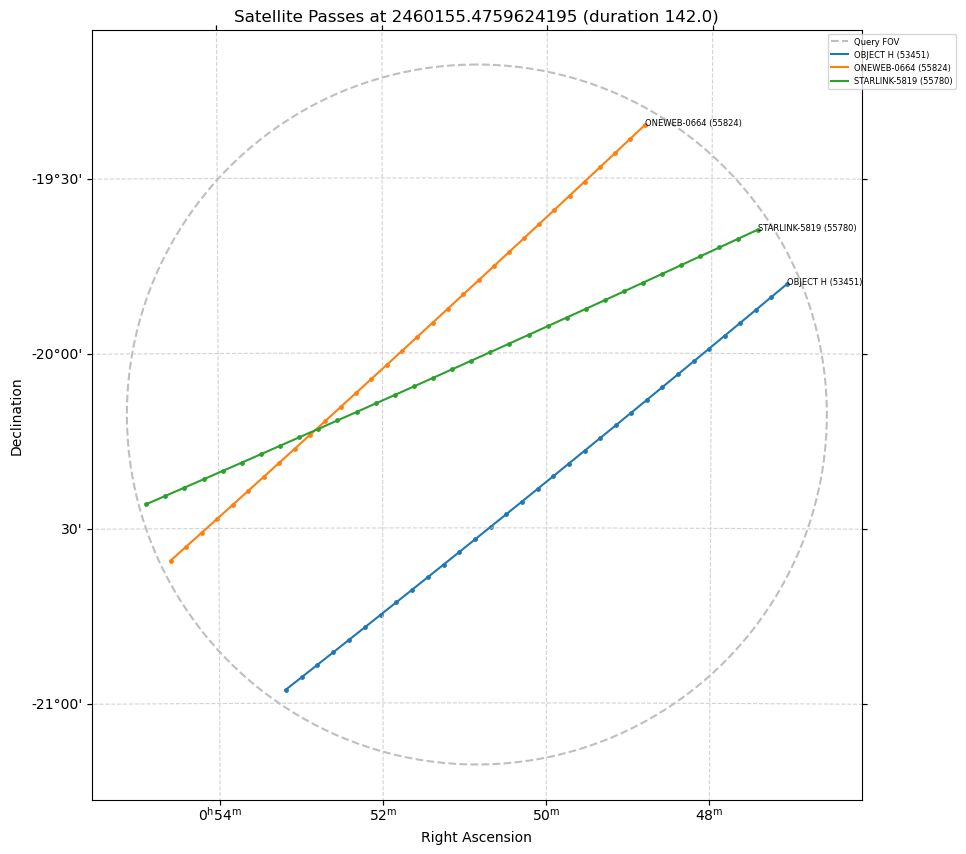

In [25]:
# Simple WCS for the plot
wcs = WCS(naxis=2)
wcs.wcs.crpix = [0, 0]
wcs.wcs.crval = [ra_center, dec_center]
wcs.wcs.cdelt = [0.1, 0.1]
wcs.wcs.ctype = ['RA---TAN', 'DEC--TAN']

fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(1, 1, 1, projection=wcs)
center = SkyCoord(ra=ra_center*u.deg, dec=dec_center*u.deg, frame='icrs')
position_angles = np.linspace(0, 360, 360) * u.deg
circle_points = center.directional_offset_by(position_angles, fov_radius * u.deg)

# Query FOV
ax.plot(circle_points.ra.deg, circle_points.dec.deg, 
        c='0.75', ls='--', label='Query FOV', transform=ax.get_transform('world'))

# Satellite tracks
for sat_name in satellites.keys():
    ra = [pos[0] for pos in satellites[sat_name]]
    dec = [pos[1] for pos in satellites[sat_name]]
    coords = SkyCoord(ra=ra*u.deg, dec=dec*u.deg)
    
    # Satellite track
    ax.plot(coords.ra.deg, coords.dec.deg, 
            transform=ax.get_transform('world'),
            label=sat_name)
        
    # Satellite position points
    ax.scatter(coords.ra.deg, coords.dec.deg, 
               transform=ax.get_transform('world'), s=6)
    
    # Start and end labels
    times = [pos[2] for pos in satellites[sat_name]]
    if coords.ra.deg[0] < coords.ra.deg[-1]:
        ax.text(coords.ra.deg[0], coords.dec.deg[0], f'{sat_name}', 
                transform=ax.get_transform('world'), fontsize="6")  
    else:
        ax.text(coords.ra.deg[-1], coords.dec.deg[-1], f'{sat_name}', 
            transform=ax.get_transform('world'), fontsize="6")

ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(0.95, 1), loc='upper left', fontsize="6")
ax.set_xlabel('Right Ascension')
ax.invert_xaxis()
ax.set_ylabel('Declination')
ax.set_title(f'Satellite Passes at {start_time_jd} (duration {duration:.1f})')
ax.grid(color='lightgray', linestyle='--')


### Random exposure
What if I choose a random exposure of the dataset?

In [9]:
random_exposure = telemetry1.sample()
random_exposure_num = random_exposure['EXPNUM'].values[0]
random_exposure_num

535205

In [18]:
rand_streak_obs = telemetry1.loc[(telemetry1['EXPNUM'] == random_exposure_num)]

In [19]:
rand_streak_obs

,EXPNUM,BAND,TELESCOP,OBSERVAT,INSTRUME,OBS-LONG,OBS-LAT,OBS-ELEV,TELEQUIN,TIMESYS,DATE-OBS,TIME-OBS,DARKTIME,EXPTIME,RA,DEC,AZ,ZD
421875,997244,z,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2021-05-14 23:00:41.019872,23:00:41.019872,6.2069,5.0,05:32:01.770,-21:51:18.799,262.0477,57.3


And then I just repeat the plot process...

In [20]:
fov_radius = 1  # degree radius for the satchecker query
location = EarthLocation.of_site('ctio')
latitude = location.lat.value  # deg
longitude = location.lon.value  # deg
elevation = location.height.value  # meters

duration = rand_streak_obs['EXPTIME'].values[0]
start_time_jd = Time(rand_streak_obs['DATE-OBS'].values[0]).jd

coord = SkyCoord(ra=rand_streak_obs['RA'].values[0], dec=rand_streak_obs['DEC'].values[0], unit=u.deg)
ra_center = coord.icrs.ra.value
dec_center = coord.icrs.dec.value

In [21]:
# Make the SatChecker API request
url_string = f"https://dev.satchecker.cps.iau.noirlab.edu/fov/satellite-passes/?latitude={latitude}&longitude={longitude}&elevation={elevation}&start_time_jd={start_time_jd}&duration={duration}&ra={ra_center}&dec={dec_center}&fov_radius={fov_radius}&group_by=satellite"
response = requests.get(url_string, timeout=60)
data = response.json()
print(url_string)

https://dev.satchecker.cps.iau.noirlab.edu/fov/satellite-passes/?latitude=-30.165277777777778&longitude=-70.815&elevation=2214.9999999993697&start_time_jd=2459349.4588081003&duration=5.0&ra=5.533825&dec=-21.855221944444445&fov_radius=1&group_by=satellite


In [22]:
# Extract RA/Dec positions for each satellite
satellites = {}

for sat_key, sat_data in data['data']['satellites'].items():
    if sat_key not in satellites:
        satellites[sat_key] = []
    # Add ra, dec, and julian_date from each position
    for position in sat_data['positions']:
        satellites[sat_key].append([
            position['ra'],
            position['dec'],
            position['julian_date']
        ])

print(f"Public catalog satellites passing through the specified FOV, as seen from CTIO, starting at {start_time_jd} JD for {duration} seconds:")
for sat in satellites:
    print(f"{sat}: {len(satellites[sat])} points")

Public catalog satellites passing through the specified FOV, as seen from CTIO, starting at 2459349.4588081003 JD for 5.0 seconds:
SL-8 R/B (11751): 6 points


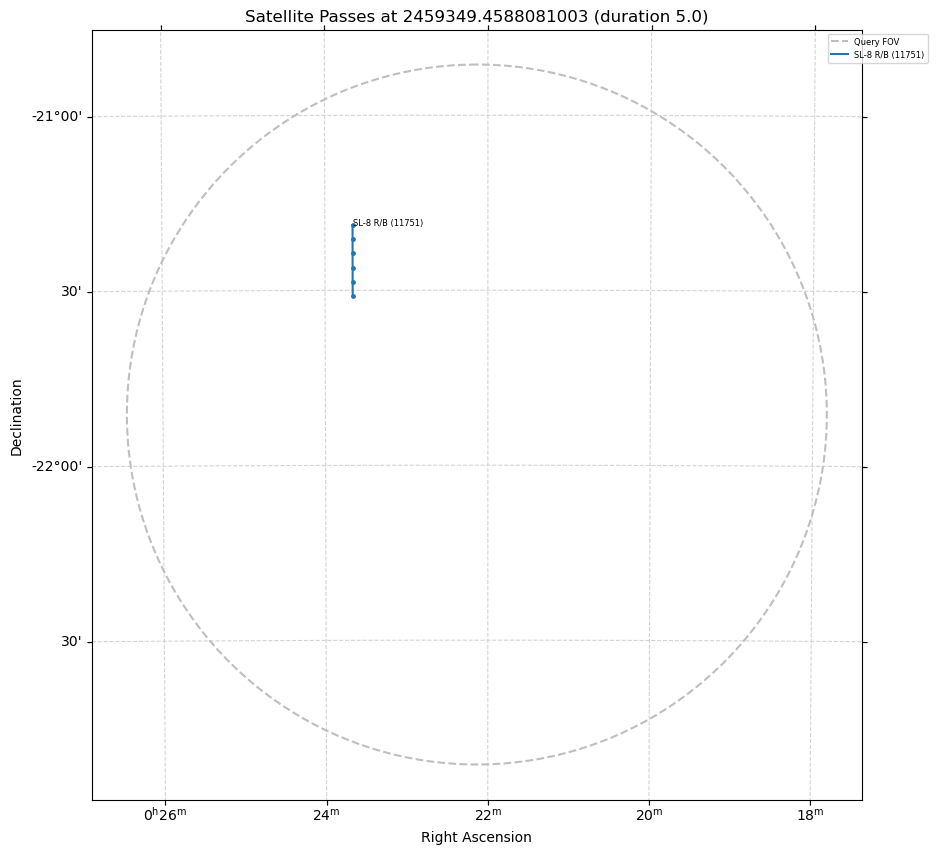

In [23]:
# Simple WCS for the plot
wcs = WCS(naxis=2)
wcs.wcs.crpix = [0, 0]
wcs.wcs.crval = [ra_center, dec_center]
wcs.wcs.cdelt = [0.1, 0.1]
wcs.wcs.ctype = ['RA---TAN', 'DEC--TAN']

fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(1, 1, 1, projection=wcs)
center = SkyCoord(ra=ra_center*u.deg, dec=dec_center*u.deg, frame='icrs')
position_angles = np.linspace(0, 360, 360) * u.deg
circle_points = center.directional_offset_by(position_angles, fov_radius * u.deg)

# Query FOV
ax.plot(circle_points.ra.deg, circle_points.dec.deg, 
        c='0.75', ls='--', label='Query FOV', transform=ax.get_transform('world'))

# Satellite tracks
for sat_name in satellites.keys():
    ra = [pos[0] for pos in satellites[sat_name]]
    dec = [pos[1] for pos in satellites[sat_name]]
    coords = SkyCoord(ra=ra*u.deg, dec=dec*u.deg)
    
    # Satellite track
    ax.plot(coords.ra.deg, coords.dec.deg, 
            transform=ax.get_transform('world'),
            label=sat_name)
        
    # Satellite position points
    ax.scatter(coords.ra.deg, coords.dec.deg, 
               transform=ax.get_transform('world'), s=6)
    
    # Start and end labels
    times = [pos[2] for pos in satellites[sat_name]]
    if coords.ra.deg[0] < coords.ra.deg[-1]:
        ax.text(coords.ra.deg[0], coords.dec.deg[0], f'{sat_name}', 
                transform=ax.get_transform('world'), fontsize="6")  
    else:
        ax.text(coords.ra.deg[-1], coords.dec.deg[-1], f'{sat_name}', 
            transform=ax.get_transform('world'), fontsize="6")

ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(0.95, 1), loc='upper left', fontsize="6")
ax.set_xlabel('Right Ascension')
ax.invert_xaxis()
ax.set_ylabel('Declination')
ax.set_title(f'Satellite Passes at {start_time_jd} (duration {duration:.1f})')
ax.grid(color='lightgray', linestyle='--')


### More than 8 streaks

To identify that exposures that appear more than 8 times at the dataset (more than 8 streaks), we can select them

In [10]:
streaks1

,filename,rnum,ra_1,ra_2,ra_3,ra_4,dec_1,dec_2,dec_3,dec_4,expnum,ccdnum,band
0,D00145425_g_c03_r4148p01_hstreak.fits,3,1.159330,1.160919,1.164310,1.162720,-28.724241,-28.724212,-28.857155,-28.857183,145425,3,g
1,D00145425_g_c06_r4148p01_hstreak.fits,1,0.986677,0.986711,0.644209,0.644186,-29.032018,-29.034283,-29.037208,-29.034944,145425,6,g
2,D00145425_g_c09_r4148p01_hstreak.fits,1,0.452852,0.452942,0.109842,0.109782,-29.193042,-29.199694,-29.203265,-29.196615,145425,9,g
3,D00145425_g_c15_r4148p01_hstreak.fits,1,0.286716,0.286812,0.630816,0.630741,-29.363308,-29.358405,-29.362739,-29.367644,145425,15,g
4,D00145425_g_c16_r4148p01_hstreak.fits,1,0.985852,0.987446,0.987211,0.985615,-29.216748,-29.216752,-29.366385,-29.366381,145425,16,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...
879115,D01223535_g_c05_r6224p01_hstreak.fits,1,323.500201,323.502653,323.444690,323.442238,-17.828499,-17.830897,-17.884254,-17.881855,1223535,5,g
879116,D01223535_g_c31_r6224p01_hstreak.fits,1,324.355544,324.369908,324.372363,324.357994,-18.392109,-18.391941,-18.541070,-18.541235,1223535,31,g
879117,D01223535_g_c56_r6224p01_hstreak.fits,1,322.914589,322.934330,322.849385,322.829651,-19.193809,-19.210870,-19.298406,-19.281342,1223535,56,g
879118,D01223535_g_c58_r6224p01_hstreak.fits,1,323.771850,323.783894,323.835739,323.823696,-19.214779,-19.204086,-19.255903,-19.266598,1223535,58,g


In [12]:
expnum_counts = streaks1['expnum'].value_counts()
expnums_mas_8 = expnum_counts[expnum_counts > 8].index
streaks_filtradas = streaks1[streaks1['expnum'].isin(expnums_mas_8)]

In [13]:
streaks_filtradas

,filename,rnum,ra_1,ra_2,ra_3,ra_4,dec_1,dec_2,dec_3,dec_4,expnum,ccdnum,band
0,D00145425_g_c03_r4148p01_hstreak.fits,3,1.159330,1.160919,1.164310,1.162720,-28.724241,-28.724212,-28.857155,-28.857183,145425,3,g
1,D00145425_g_c06_r4148p01_hstreak.fits,1,0.986677,0.986711,0.644209,0.644186,-29.032018,-29.034283,-29.037208,-29.034944,145425,6,g
2,D00145425_g_c09_r4148p01_hstreak.fits,1,0.452852,0.452942,0.109842,0.109782,-29.193042,-29.199694,-29.203265,-29.196615,145425,9,g
3,D00145425_g_c15_r4148p01_hstreak.fits,1,0.286716,0.286812,0.630816,0.630741,-29.363308,-29.358405,-29.362739,-29.367644,145425,15,g
4,D00145425_g_c16_r4148p01_hstreak.fits,1,0.985852,0.987446,0.987211,0.985615,-29.216748,-29.216752,-29.366385,-29.366381,145425,16,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...
879102,D01223533_g_c21_r6224p01_hstreak.fits,1,322.350759,322.367974,322.430509,322.413294,-19.778872,-19.762994,-19.822898,-19.838787,1223533,21,g
879103,D01223533_g_c27_r6224p01_hstreak.fits,1,321.914442,321.929370,322.039930,322.024991,-19.992600,-19.979549,-20.091439,-20.104500,1223533,27,g
879104,D01223533_g_c33_r6224p01_hstreak.fits,2,321.914515,321.920861,321.868432,321.862089,-20.207886,-20.214118,-20.261253,-20.255020,1223533,33,g
879105,D01223533_g_c44_r6224p01_hstreak.fits,1,323.071804,323.087515,323.208026,323.192338,-20.367516,-20.345896,-20.422967,-20.444584,1223533,44,g


In [27]:
expnum_counts[expnum_counts > 8] # How many times that exposure appear in the dataset

619360     61
189384     61
646812     61
1150145    61
193580     61
           ..
220686      9
915972      9
907578      9
420085      9
1069083     9
Name: expnum, Length: 38030, dtype: int64

In [28]:
expnums_mas_8 = expnum_counts[expnum_counts > 8].index.tolist() # Which are those exposures that have more than 8 streaks
#print(expnums_mas_8)

In [29]:
len(set(expnums_mas_8))

38030

In [15]:
lot_of_streaks = telemetry1.loc[(telemetry1['EXPNUM'] == 915972)]  # I select the first for the example, that it's supossed to have 61 streaks (that's a lot, it's possible??)
lot_of_streaks 

,EXPNUM,BAND,TELESCOP,OBSERVAT,INSTRUME,OBS-LONG,OBS-LAT,OBS-ELEV,TELEQUIN,TIMESYS,DATE-OBS,TIME-OBS,DARKTIME,EXPTIME,RA,DEC,AZ,ZD
385060,915972,i,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2019-12-10 03:08:31.077469,03:08:31.077469,236.115,235.0,06:30:46.048,-26:52:57.796,95.9703,37.75


In [31]:
fov_radius = 1  # degree radius for the satchecker query
location = EarthLocation.of_site('ctio')
latitude = location.lat.value  # deg
longitude = location.lon.value  # deg
elevation = location.height.value  # meters

In [32]:
duration = lot_of_streaks['EXPTIME'].values[0]
start_time_jd = Time(lot_of_streaks['DATE-OBS'].values[0]).jd

In [33]:
coord = SkyCoord(ra=lot_of_streaks['RA'].values[0], dec=lot_of_streaks['DEC'].values[0], unit=u.deg)
ra_center = coord.icrs.ra.value
dec_center = coord.icrs.dec.value

In [34]:
# Make the SatChecker API request
url_string = f"https://dev.satchecker.cps.iau.noirlab.edu/fov/satellite-passes/?latitude={latitude}&longitude={longitude}&elevation={elevation}&start_time_jd={start_time_jd}&duration={duration}&ra={ra_center}&dec={dec_center}&fov_radius={fov_radius}&group_by=satellite"
response = requests.get(url_string, timeout=60)
data = response.json()
print(url_string)

https://dev.satchecker.cps.iau.noirlab.edu/fov/satellite-passes/?latitude=-30.165277777777778&longitude=-70.815&elevation=2214.9999999993697&start_time_jd=2457795.8043733533&duration=150.0&ra=6.691971944444445&dec=-50.96080388888889&fov_radius=1&group_by=satellite


In [35]:
# Extract RA/Dec positions for each satellite
satellites = {}

for sat_key, sat_data in data['data']['satellites'].items():
    if sat_key not in satellites:
        satellites[sat_key] = []
    # Add ra, dec, and julian_date from each position
    for position in sat_data['positions']:
        satellites[sat_key].append([
            position['ra'],
            position['dec'],
            position['julian_date']
        ])

print(f"Public catalog satellites passing through the specified FOV, as seen from CTIO, starting at {start_time_jd} JD for {duration} seconds:")
for sat in satellites:
    print(f"{sat}: {len(satellites[sat])} points")

Public catalog satellites passing through the specified FOV, as seen from CTIO, starting at 2457795.8043733533 JD for 150.0 seconds:
COSMOS 1275 DEB (13485): 19 points
COSMOS 158 (2801): 27 points
COSMOS 2251 DEB (37303): 27 points
COSMOS 2353 (25364): 45 points
DELTA 1 DEB (17764): 15 points
DELTA 1 DEB (21387): 17 points
DELTA 1 DEB (7044): 7 points
FENGYUN 1C DEB (29873): 3 points
FENGYUN 1C DEB (31675): 22 points
NIMBUS 2 DEB (28203): 21 points
SL-24 R/B (28811): 7 points
THOR ABLESTAR DEB (479): 19 points
THORAD DELTA 1 DEB (8562): 33 points
THORAD DELTA 1 R/B (7532): 27 points
TIANHUI 1-03 (40988): 7 points


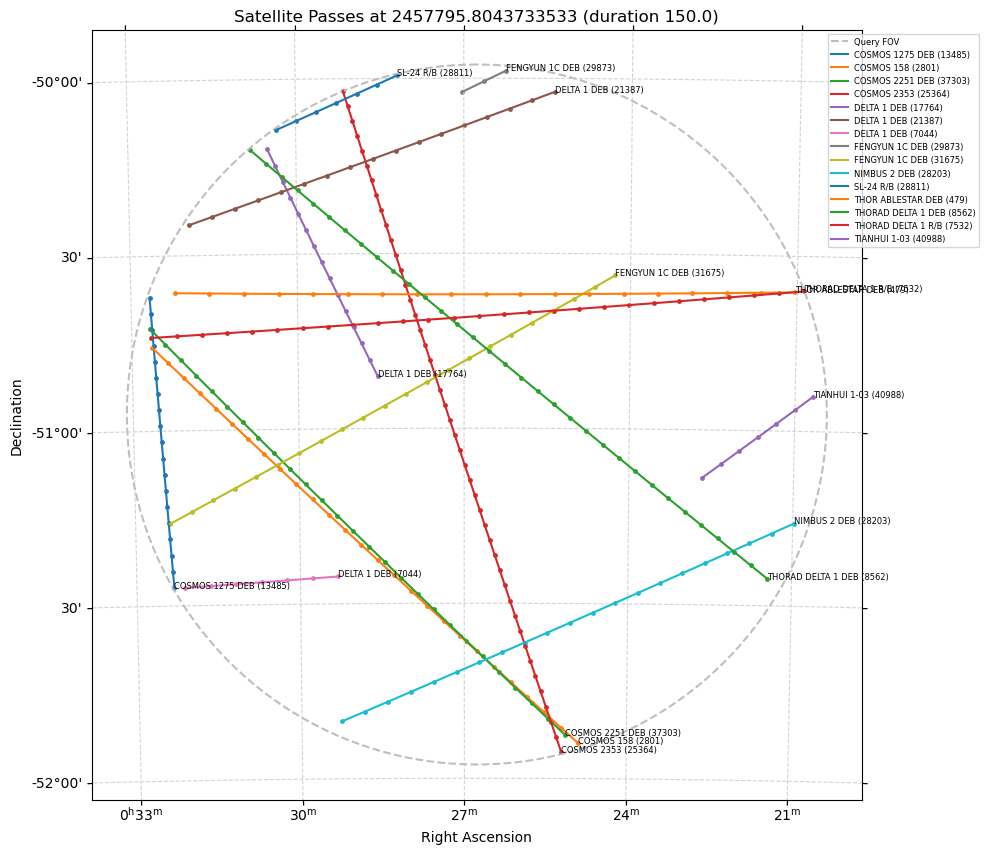

In [36]:
# Simple WCS for the plot
wcs = WCS(naxis=2)
wcs.wcs.crpix = [0, 0]
wcs.wcs.crval = [ra_center, dec_center]
wcs.wcs.cdelt = [0.1, 0.1]
wcs.wcs.ctype = ['RA---TAN', 'DEC--TAN']

fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(1, 1, 1, projection=wcs)
center = SkyCoord(ra=ra_center*u.deg, dec=dec_center*u.deg, frame='icrs')
position_angles = np.linspace(0, 360, 360) * u.deg
circle_points = center.directional_offset_by(position_angles, fov_radius * u.deg)

# Query FOV
ax.plot(circle_points.ra.deg, circle_points.dec.deg, 
        c='0.75', ls='--', label='Query FOV', transform=ax.get_transform('world'))

# Satellite tracks
for sat_name in satellites.keys():
    ra = [pos[0] for pos in satellites[sat_name]]
    dec = [pos[1] for pos in satellites[sat_name]]
    coords = SkyCoord(ra=ra*u.deg, dec=dec*u.deg)
    
    # Satellite track
    ax.plot(coords.ra.deg, coords.dec.deg, 
            transform=ax.get_transform('world'),
            label=sat_name)
        
    # Satellite position points
    ax.scatter(coords.ra.deg, coords.dec.deg, 
               transform=ax.get_transform('world'), s=6)
    
    # Start and end labels
    times = [pos[2] for pos in satellites[sat_name]]
    if coords.ra.deg[0] < coords.ra.deg[-1]:
        ax.text(coords.ra.deg[0], coords.dec.deg[0], f'{sat_name}', 
                transform=ax.get_transform('world'), fontsize="6")  
    else:
        ax.text(coords.ra.deg[-1], coords.dec.deg[-1], f'{sat_name}', 
            transform=ax.get_transform('world'), fontsize="6")

ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(0.95, 1), loc='upper left', fontsize="6")
ax.set_xlabel('Right Ascension')
ax.invert_xaxis()
ax.set_ylabel('Declination')
ax.set_title(f'Satellite Passes at {start_time_jd} (duration {duration:.1f})')
ax.grid(color='lightgray', linestyle='--')


### Filter for Starlink Satellites

In [16]:
telemetry1_filtrado = telemetry1[telemetry1['EXPNUM'].isin(streaks_filtradas['expnum'])]

In [17]:
telemetry1_filtrado

,EXPNUM,BAND,TELESCOP,OBSERVAT,INSTRUME,OBS-LONG,OBS-LAT,OBS-ELEV,TELEQUIN,TIMESYS,DATE-OBS,TIME-OBS,DARKTIME,EXPTIME,RA,DEC,AZ,ZD
1849,145434,z,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2012-11-02 04:53:58.963709,04:53:58.963709,31.1660,30.0,00:03:06.361,-29:47:35.696,259.1000,37.55
1856,145505,r,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2012-11-02 06:18:03.596634,06:18:03.596634,61.1374,60.0,02:24:27.068,-04:16:03.299,307.0800,37.89
1866,145555,i,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2012-11-02 07:25:16.269456,07:25:16.269456,31.0896,30.0,04:34:13.969,15:11:05.500,341.6200,47.11
1867,145558,i,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2012-11-02 07:32:27.251025,07:32:27.251025,91.0933,90.0,04:34:13.530,15:11:02.098,339.3600,47.63
1868,145559,i,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2012-11-02 07:34:26.345592,07:34:26.345592,91.1038,90.0,04:35:39.350,14:51:01.199,339.0600,47.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504509,1223518,g,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2023-07-21 04:02:44.144925,04:02:44.144925,91.1284,90.0,20:12:31.741,-01:22:56.798,28.9529,32.15
504511,1223520,g,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2023-07-21 04:07:18.281902,04:07:18.281902,91.0861,90.0,20:41:41.381,-07:41:56.699,45.5025,29.97
504519,1223528,g,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2023-07-21 04:25:07.161563,04:25:07.161563,91.1412,90.0,21:22:27.278,-20:05:40.600,73.4940,26.26
504523,1223532,g,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2023-07-21 04:33:18.720174,04:33:18.720174,91.0856,90.0,21:32:30.502,-21:38:18.200,77.0527,25.96


In [1]:
streaks_filtradas

NameError: name 'streaks_filtradas' is not defined

In [33]:
#expnumtry = telemetry1_filtrado['EXPNUM'].unique()  # Usaria toooooodos los datos :p
expnumtry = telemetry1_filtrado['EXPNUM'].drop_duplicates().sample(10, random_state=42) # Random exposures


In [34]:
site = EarthLocation.of_site('ctio')
#lat, lon, elev = site.lat.value, site.lon.value, site.height.value


In [35]:
# Contenedores de resultados
expnum_starlink   = []   # exposures que tuvieron al menos 1 STARLINK
satmap_starlink   = []   # lista de nombres Starlink para cada exposure
satmap_completo   = {}  
todos_satelites = {} 
starlinks_en_exp = []
fov_radius=1


In [36]:
for exp in tqdm(expnumtry, desc="Buscando STARLINKs"):
    fila = telemetry1_filtrado[telemetry1_filtrado['EXPNUM'] == exp].iloc[0] #row

    #print(fila)
    try:
        ra = fila['RA']
        dec = fila['DEC']
        latitude = fila ['OBS-LAT']
        longitude = fila['OBS-LONG']
        elevation = fila['OBS-ELEV']
        exptime = fila['EXPTIME']
        timeobs = fila['TIME-OBS']
        dateobs = fila['DATE-OBS']
        duration = fila['EXPTIME']
        start_time_jd = Time(fila['DATE-OBS']).jd

        # Conversión de coordenadas y fecha
        coord = SkyCoord(ra=fila['RA'], dec=fila['DEC'], unit=u.deg)
        ra_center = coord.icrs.ra.value
        dec_center = coord.icrs.dec.value
        print(f"Running query for expnum{exp}")
        
        # URL para la API
        url = f"https://dev.satchecker.cps.iau.noirlab.edu/fov/satellite-passes/?latitude={latitude}&longitude={longitude}&elevation={elevation}&start_time_jd={start_time_jd}&duration={duration}&ra={ra_center}&dec={dec_center}&fov_radius={fov_radius}&group_by=satellite"
        response = requests.get(url, timeout=60)
        response.raise_for_status()
        data = response.json()['data']['satellites']            
        
        # Guardar todos los satélites si quieres
        todos_satelites[exp] = list(data.keys())

        # Filtrar Starlink
        starlinks = [sat for sat in data if 'STARLINK' in sat.upper()]  # It was hard to find STARLINKs in a small sample, so I tried with COSMOS instead, they seem more common
        print(exp, starlinks)
        if starlinks:
            expnum_starlink.append(exp)
            starlinks_en_exp.append(starlinks)

    except Exception as e:
        print(f"⚠️ Error en expnum {exp}: {e}")
        continue

# Crear DataFrame con resultados
df_starlink = pd.DataFrame({
    'EXPNUM': expnum_starlink,
    'starlinks': starlinks_en_exp
})

# Vista rápida
print(df_starlink.head())


Buscando STARLINKs:   0%|                                                                       | 0/10 [00:00<?, ?it/s]

Running query for expnum946224


Buscando STARLINKs:  10%|██████▎                                                        | 1/10 [00:17<02:37, 17.49s/it]

946224 []
Running query for expnum157334


Buscando STARLINKs:  20%|████████████▌                                                  | 2/10 [00:36<02:25, 18.14s/it]

157334 []
Running query for expnum1025163


Buscando STARLINKs:  30%|██████████████████▉                                            | 3/10 [00:51<01:59, 17.08s/it]

1025163 []
Running query for expnum1215959


Buscando STARLINKs:  40%|█████████████████████████▏                                     | 4/10 [01:14<01:55, 19.31s/it]

1215959 []
Running query for expnum1058234


Buscando STARLINKs:  50%|███████████████████████████████▌                               | 5/10 [01:26<01:22, 16.49s/it]

1058234 []
Running query for expnum1215919


Buscando STARLINKs:  60%|█████████████████████████████████████▊                         | 6/10 [01:32<00:52, 13.19s/it]

1215919 []
Running query for expnum970728


Buscando STARLINKs:  70%|████████████████████████████████████████████                   | 7/10 [01:45<00:39, 13.11s/it]

970728 []
Running query for expnum250715


Buscando STARLINKs:  80%|██████████████████████████████████████████████████▍            | 8/10 [02:07<00:31, 15.94s/it]

250715 []
Running query for expnum1019973


Buscando STARLINKs:  90%|████████████████████████████████████████████████████████▋      | 9/10 [02:16<00:13, 13.61s/it]

1019973 []
Running query for expnum1011967


Buscando STARLINKs: 100%|██████████████████████████████████████████████████████████████| 10/10 [02:22<00:00, 14.28s/it]

1011967 ['STARLINK-1963 (47564)']
    EXPNUM                starlinks
0  1011967  [STARLINK-1963 (47564)]


Exposure 1215959  have two starlinks...

In [37]:
df_starlink

,EXPNUM,starlinks
0,1011967,[STARLINK-1963 (47564)]


In [38]:
todos_satelites

{946224: ['DELTA 1 R/B (3094)',
  'FENGYUN 1C DEB (30843)',
  'SAUDICOMSAT 4 (31127)'],
 157334: ['SL-16 DEB (22430)', 'SL-8 DEB (21251)'],
 1025163: [],
 1215959: [],
 1058234: ['COSMOS 2416 (28908)', 'NEE 01 PEGASUS (39151)'],
 1215919: [],
 970728: ['SL-8 R/B (22488)'],
 250715: ['ATLAS 2A CENTAUR R/B (25968)',
  'COSMOS 2251 DEB (35431)',
  'COSMOS 2251 DEB (35784)',
  'COSMOS 2251 DEB (35834)',
  'DELTA 2 R/B(1) (23640)',
  'DMSP 5D-2 F14 DEB (24777)',
  'FENGYUN 1C DEB (30016)',
  'FENGYUN 1C DEB (36269)',
  'SL-16 DEB (23407)',
  'SL-8 DEB (27747)',
  'SUPERBIRD A1 (22253)',
  'THORAD AGENA D DEB (4821)',
  'YAMAL 102 (25897)'],
 1019973: ['BREEZE-KM R/B (39252)',
  'ONEWEB-0190 (48796)',
  'ONEWEB-0246 (48786)',
  'ONEWEB-0248 (48798)'],
 1011967: ['STARLINK-1963 (47564)', 'TURKSAT 3U (39152)']}